In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4255.jpg
/kaggle/

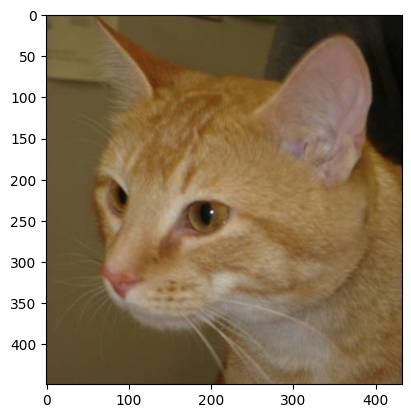

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
img = npimg.imread('/kaggle/input/cat-and-dogs/dataset/training_set/cats/cat.3664.jpg')
imgplot = plt.imshow(img)
plt.show()

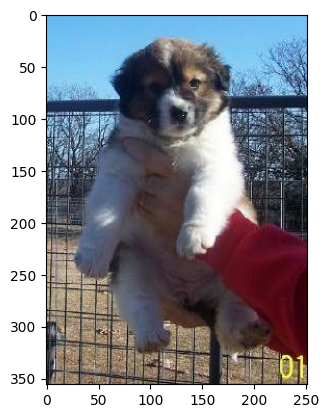

In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
img = npimg.imread('/kaggle/input/cat-and-dogs/dataset/training_set/dogs/dog.434.jpg')
imgplot = plt.imshow(img)
plt.show()

In [4]:
import tensorflow as tf
import keras

2024-06-03 08:49:35.603399: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 08:49:35.603569: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 08:49:35.781372: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
print(tf.__version__)

2.15.0


In [6]:
img_width = 150
img_height = 150
train_data_dir = r"/kaggle/input/cat-and-dogs/dataset/training_set"
validation_data_dir = r"/kaggle/input/cat-and-dogs/dataset/test_set"

In [7]:
epochs = 5
batch_size = 20
nb_train_sample = 10
nb_validation_samples = 10


In [8]:
import tensorflow.keras.backend as k
if k.image_data_format() == 'channels_first':
    input_shape = (3,img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
    )

In [11]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width,img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        classes = ['cats','dogs']
        )

Found 8000 images belonging to 2 classes.


In [12]:
validation_generator = train_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width,img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        )

Found 2000 images belonging to 2 classes.


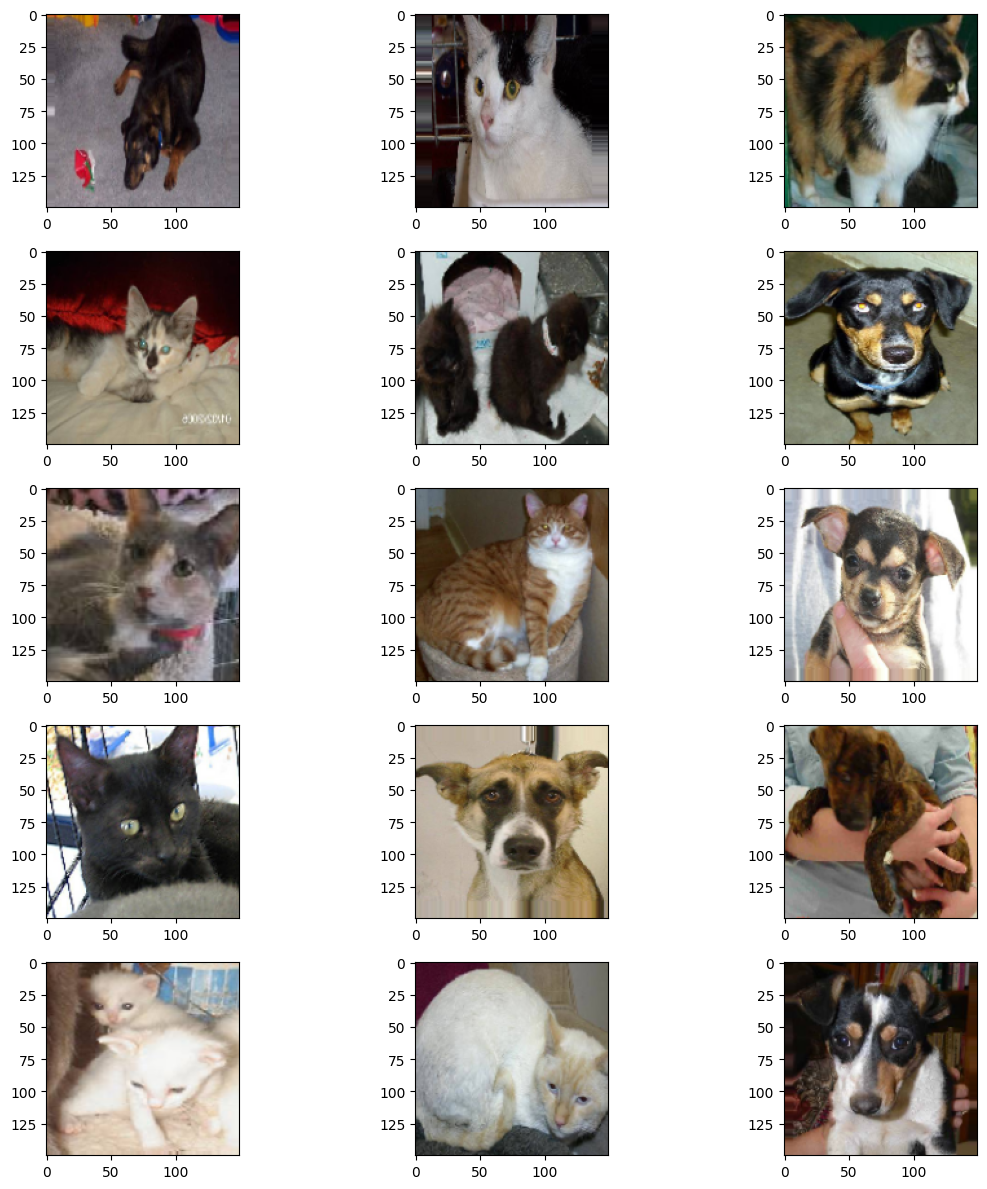

In [13]:
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

CNN MODEL LAYERS:
   1.CONVOLUTIONAL LAYER
   2. ReLu
   3. POOLING LAYER
   4. DENSE (FULLY CONNECTED) LAYER

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
model = Sequential()
n_neurons = 64
filter_size = (3,3)
model.add(Conv2D(n_neurons, filter_size, input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(n_neurons))

model.add(Activation('relu'))
model.add(Dense(1))

model.add(Activation('sigmoid'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 148, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 350464)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    22,429,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 148, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 350464)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    22,429,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,431,617 (85.57 MB)

 Trainable params: 22,431,617 (85.57 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
training = model.fit(
    train_generator,
    steps_per_epoch = nb_train_sample,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 850ms/step - accuracy: 0.4213 - loss: 14.5800 - val_accuracy: 0.4750 - val_loss: 2.1068
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 734ms/step - accuracy: 0.5027 - loss: 1.3746 - val_accuracy: 0.5500 - val_loss: 0.6919
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 747ms/step - accuracy: 0.4577 - loss: 0.9672 - val_accuracy: 0.5800 - val_loss: 0.6716
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 659ms/step - accuracy: 0.5749 - loss: 0.6972 - val_accuracy: 0.6100 - val_loss: 0.6430
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 639ms/step - accuracy: 0.6039 - loss: 0.6358 - val_accuracy: 0.5350 - val_loss: 0.7034


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


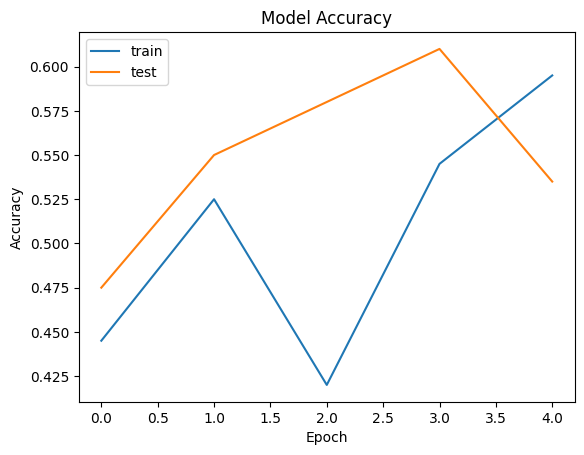

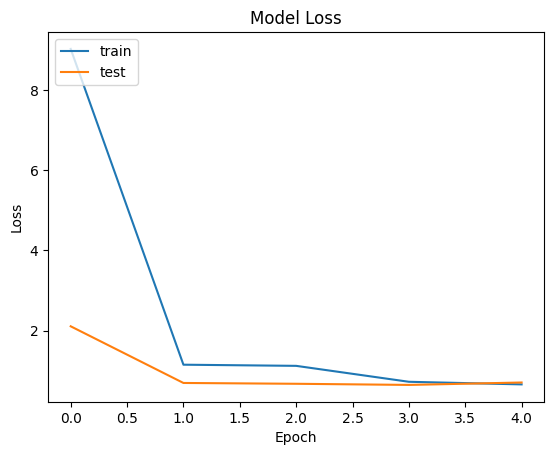

In [17]:
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img('/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4003.jpg',target_size = (150,150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)
answer = model.predict(img_pred)
print(answer)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[0.]]


In [19]:
if answer[0][0] == 1:
    prediction = "DOG"
else:
    prediction = "CAT"
print("YAY!It's a ",prediction)

YAY!It's a  CAT


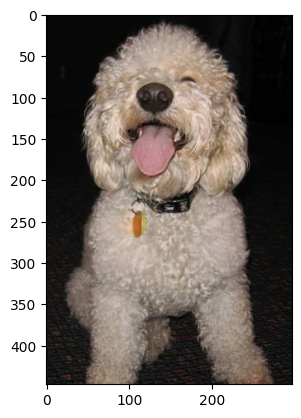

In [20]:
img = npimg.imread('/kaggle/input/cat-and-dogs/dataset/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()